NOTRE KERNEL :

# 1. Compréhension du problème lié au Business

Toutes ces données : pourquoi faire ?

Exemple :

Une banque souhaite pouvoir automatiser la lecture des montants sur les chèques.
Pour cela, nous sommes sollicités afin de fournir un programme capable de lire des chiffres écrits à la main

# 1. Compréhension des données : Analyse des données d'entraînement

Dans cette partie, on réalise les opérations à la main pour comprendre les données :

## a) Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import warnings
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## b) Chargement des données :

In [14]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Train = train_df.values
Test = test_df.values

X = (Train[:,1:])
Y = (Train[:,0])

combine = [train_df, test_df]

## c) Préparation des données

On récupère dans un premier temps le pattern des données, présent dans le document d'entraînement "train.csv" :

In [11]:
print(train_df.columns.values)

['label' 'pixel0' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6'
 'pixel7' 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13'
 'pixel14' 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20'
 'pixel21' 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27'
 'pixel28' 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34'
 'pixel35' 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41'
 'pixel42' 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48'
 'pixel49' 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55'
 'pixel56' 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62'
 'pixel63' 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69'
 'pixel70' 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76'
 'pixel77' 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83'
 'pixel84' 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90'
 'pixel91' 'pixel92' 'pixel93' 'pixel94' 'pixel95' 'pixel96' 'pixel97'
 'pixel9

Cette commande nous indique qu'il y a en tout 785 colonnes :

- La 1ère colonne correspond à la colonne des étiquettes
- Les autres colonnes correspondent à la suite des valeurs des pixels de chaque image

Ainsi, chaque ligne du fichier, à l'exception de la 1ère qui correspond au pattern présenté ci-dessus, représente une image par la suite des valeurs de ses pixels. Les images font donc 784 pixels chacune.

Le 1er élément de la ligne est l'étiquette, ici c'est un nombre qui correspond au digit (nombre) que représente l'image.
Nous allons donc réaliser du Machine Learning supervisé.

#### Visualisation et description générale des données :

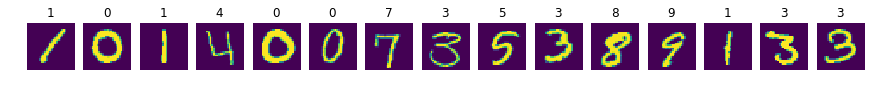

In [15]:
fig1, ax1 = plt.subplots(1,15, figsize=(15,10))
for i in range(15):
    ax1[i].imshow(X[i].reshape((28,28)))
    ax1[i].axis('off')
    ax1[i].set_title(Y[i])

In [5]:
# Prévisualisation des données
print(train_df.head())

# Description des données
print(train_df.info())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

On peut voir que l'objet pandas qui a servi au chargement des données, retourne un objet de type Data Frame.
Cette commande nous indique également qu'il y a 42000 lignes :

- Comme dit précédemment, la 1ère est le pattern
- Les 41999 autres lignes sont les images

Les valeurs stockées sont toutes des entiers.

Les 785 colonnes contiennent toutes des valeurs catégoriques (à l'exception de la première ligne qui contient les noms des colonnes).

#### Les données présentent-elles des trous ou des valeurs non entières ?

In [12]:
def containsOnlyIntegerValues(matrix):

	for line in range(len(matrix)):
		for col in range(len(matrix[0])):
			try :
				int(matrix[line][col])
			except :
				return False

	return True

matrix = train_df.values.tolist()
print(containsOnlyIntegerValues(matrix))

True


Cette fonction nous apprend que nos données sont correctement formées et toutes la valeurs sont bien des entiers.
Il n'y a pas de valeur manquante.

#### Étudions maintenant la plage de données de chaque colonne :

In [7]:
def getColumnsRange(matrix):

	output = []

	for col in range(len(matrix[0])):
		colRange = []
		for line in range(len(matrix)):
			value = matrix[line][col]
			if not (value in colRange):
				colRange.append(value)
			colRange.sort()

		output.append(colRange)

	return output

print(train_df.describe())
print(getColumnsRange(matrix))

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min       

On observe ainsi que la 1ère colonne, la colonne des étiquette prend les valeurs suivantes : de 0 à 9

Et les autres colonnes prennent les valeurs suivantes :  de 0 à 255
Cela confirme donc que les données contiennent des images représentant les chiffres 0, 1, 2, ..., 9
En d'autre terme une image représente bien un unique chiffre et ce chiffre peut être un 0, un 1, ... ou un 9.
De plus, les images sont représentées en niveaux de gris et sont codées sur 8 bits.

Enfin, on peut également observer que des colonnes ne possèdent que très peu de valeurs voir qu'une seule (pixel noir). Cela signifie que nos images ont des portions communes qui sont identiques (les chiffres sont entourés de couleur noire dans chaque image. Nous verrons par la suite s'il est intéressant d'enlever ces colonnes.

## d) Analyse des données

#### Étudions maintenant la distribution des données :

In [18]:
def getDateDistribution(matrix):
	
	dict = {}
	numberOfLines = len(matrix)

	for line in range(numberOfLines):
		value = matrix[line][0]

		if value in dict:
			occurrences = dict[value]
			occurrences += 1
			dict[value] = occurrences

		else:
			dict[value] = 1

	for value in dict:
		occurrences = dict[value]
		percentage = (occurrences * 100) / numberOfLines
		dict[value] = percentage

	return dict

dict = getDateDistribution(matrix)

for i in dict:
	print("Digit : " + str(i) + "\t" + str(dict[i]) + "%")
    


Digit : 1	11.152380952380952%
Digit : 0	9.838095238095239%
Digit : 4	9.695238095238095%
Digit : 7	10.478571428571428%
Digit : 3	10.35952380952381%
Digit : 5	9.035714285714286%
Digit : 8	9.673809523809524%
Digit : 9	9.971428571428572%
Digit : 2	9.945238095238095%
Digit : 6	9.85%


On observe ainsi que les données sont réparties dans les bonnes proportions : il y a quasiment autant de 0 que de 1 que de 2, etc ...

Mais les images sont-elles réparties de manière uniforme ?
Pour le savoir, dressons l'histogramme :

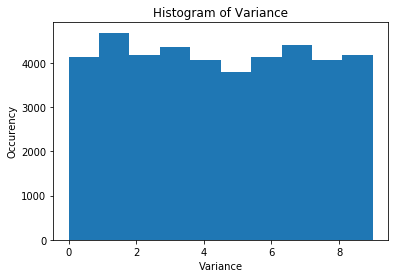

In [17]:
plt.hist(Y, )
plt.title("Histogram of Variance")
plt.xlabel("Variance")
plt.ylabel("Occurency")
plt.show()

#### Représentation de la variance

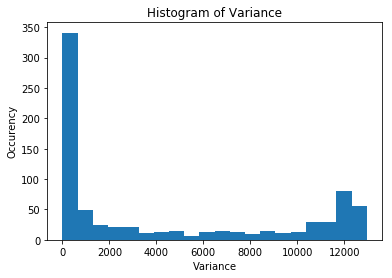

In [19]:
variance_hist = np.var(X, axis = 0)
plt.hist(variance_hist, 20)
plt.title("Histogram of Variance")
plt.xlabel("Variance")
plt.ylabel("Occurency")
plt.show()

#### Visualisation de toutes les données

L'utilité de la réduction de dimensionnalité peut ne pas être entièrement évidente dans deux dimensions seulement, mais devient beaucoup plus claire lorsque l'on regarde des données de grande dimension. Dans notre cas nous sommes en dimension 784, cela est donc difficile de visualiser nos données dans l'ensemble. L'utilité de PCA dans un premier temps est de nous permettre de retourner en dimension 2 pour visualiser nos données. 

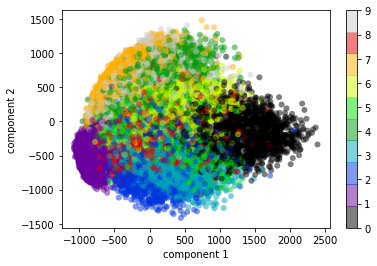

In [23]:
pca_vizualise = PCA(2)  # project from 64 to 2 dimensions
projected = pca_vizualise.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()



les données complètes sont un nuage de points de 784 dimensions, et ces points sont la projection de chaque point de données le long des directions présentant la variance la plus grande. Pour l'essentiel, nous avons trouvé l'étirement et la rotation optimaux dans un espace à 784 dimensions qui nous permet de voir la disposition des chiffres en deux dimensions, et ce, de manière non supervisée, c'est-à-dire sans référence aux étiquettes.

# 2. Réduction des données en utilisant PCA

Une des applications les plus importantes de la PCA est d’accélérer les algorithmes d’apprentissage automatique.

In [24]:
from sklearn.decomposition import PCA
# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000
print(variance.shape)
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA()
pca.fit(X)

(784,)
(42000, 412)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### a. Plot graph of component vs. cumulative explained variance .
This graph will help us in choosing the no of components for training our data.

Une partie vitale de PCA est d’estimer le nombre de composants nécessaire à la description des données pour l’utilisation concrète de PCA. Ceci peut être déterminé en examinant le ratio de variance expliquée cumulative en fonction du nombre de composants:

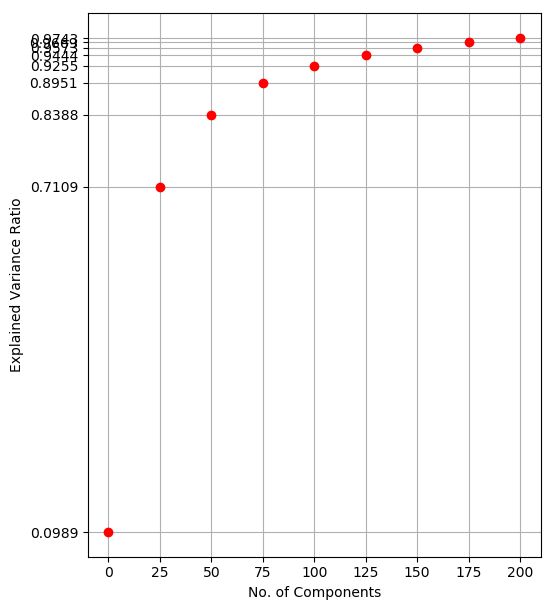

In [26]:

explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.show()

Cette courbe quantifie la part de la variance totale à 784 dimensions contenue dans les N premières composantes. Par exemple, nous voyons qu'avec les chiffres, les 25 premiers composants contiennent environ 75% de la variance, alors qu'il nous faut environ 175 composants pour décrire près de 100% de la variance.

Nous voyons ici que notre projection bidimensionnelle perd beaucoup d’informations (mesurée par la variance expliquée) et qu’il nous faudrait environ 75 composantes pour conserver 90% de la variance. L'analyse de ce graphique pour rechercher un jeu de données de grande dimensions aide à comprendre le niveau de redondance présent dans plusieurs observations.

**So Looking on the above graph, 50 components comprise 80% variance. So first we will go with 50 componets**

### Splitting data for training and testing
- Training data: 80%
- Test data: 20%

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

### define normalize function for normalizing the data, PrincipalComponents function to return top n principal components.

In [29]:

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def PolynomialFeatures1(X):
    X_2 = np.square(X)
    X = np.column_stack((X, X_2))
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    return X_train1, X_test1

## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    print("penalty= ", penalty)
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    print(len(Prediction))
    return score1, score2, Prediction



**So usually variance of 0.8 is sufficient to explain the variation in data, so we will first train data by taking the top n principal components which can explaine the variance of 0.8**

In [ ]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components
J1 = []
J2 = []
P = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                    X_test1[:i+1,:], y_test[:i+1], 0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    P = Prediction
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, P)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);




- We got a very irregular graph and not a satisfied accuracy and the accuracy doesn't increase with the increaing training data. So it seems that we are suffering from a high bias. Let us try to train data with top n components explaining the variance of 0.9

In [0]:
X_train1, X_test1 = PrincipalComponents(0.9)
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:],
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

** We can see that accuracy didn't increase much so it doesn't seems a gud idea. Let us again take top n components explaining the variance of 0.8 and also include thieir polynomials(degree = 2)**.

#### Add polynomial features

##### 1.Logistic Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

X_train1 = poly.fit_transform(X_train1)
X_test1 = poly.transform(X_test1)

print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

** We got way better accuracy here and is data over  fitting .... may be but since we are getting good result on cross validation data also, It's gud to go with this.**

#### Saving data trained with logistic regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

#### I submitted the data and got an accuracy of 0.9815. Now we will try to train data with SVM and kernel = 'rbf'. Note we will not use polynomial features with SVM since SVM maps the data in higher dimensions so there is no point in including the polynomial features, also SVM doesn't perform well with too many features.

##### 2.SVM

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

def supportVM(X_train2, y_train2, X_test2, y_test2, penalty):
    regr = SVC(kernel ='rbf', C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = supportVM(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],10)
    J1.append(1-score1)
    J2.append(1-score2)
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

- So it seems that this model is performin a little bit better, So we will go with it, Let's save the prediction and save it.

##### Saving prediction trained with SVM

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = SVC(kernel ='rbf', C=10)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_svm.csv', 
                                                                      index=False, header=True)

** I got an accuracy of 0.98442 on leaderboad with above model**.
I am learning CNN, So in future I will use that to train data and most probably I will launch a kernel also .Please give your valuable feedback.